# Presentation: Statistical Learning Course

### Name: ONOJA Anthony PhD Data Science, Scuola Normale Superiore, Pisa, Italy

##### Importing necessary libraries

In [1]:
# Import all the necessary libraries for the analysis 
# Import all the necessary libraries for the analysis 

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
import scipy


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Getting the dataset
df = pd.read_csv("hotel_data.csv")

In [3]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_week_number,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,27,1/7/2015,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,27,1/7/2015,0,0,2,0.0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,27,1/7/2015,0,1,1,0.0,0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,27,1/7/2015,0,1,1,0.0,0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [4]:
print(df.size)
print(df.shape)

3581700
(119390, 30)


In [5]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_week_number',
       'arrival_date', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_week_number               119390 non-null int64
arrival_date                      119390 non-null object
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
repeated_guest                    119390 non-null int64
previous_cancellations            119390 

In [7]:
# Get some decriptive statistics (count, mean, std, minimum, maximum, 25%, 50% and 75% percentiles)
df.describe()

,is_canceled,lead_time,arrival_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

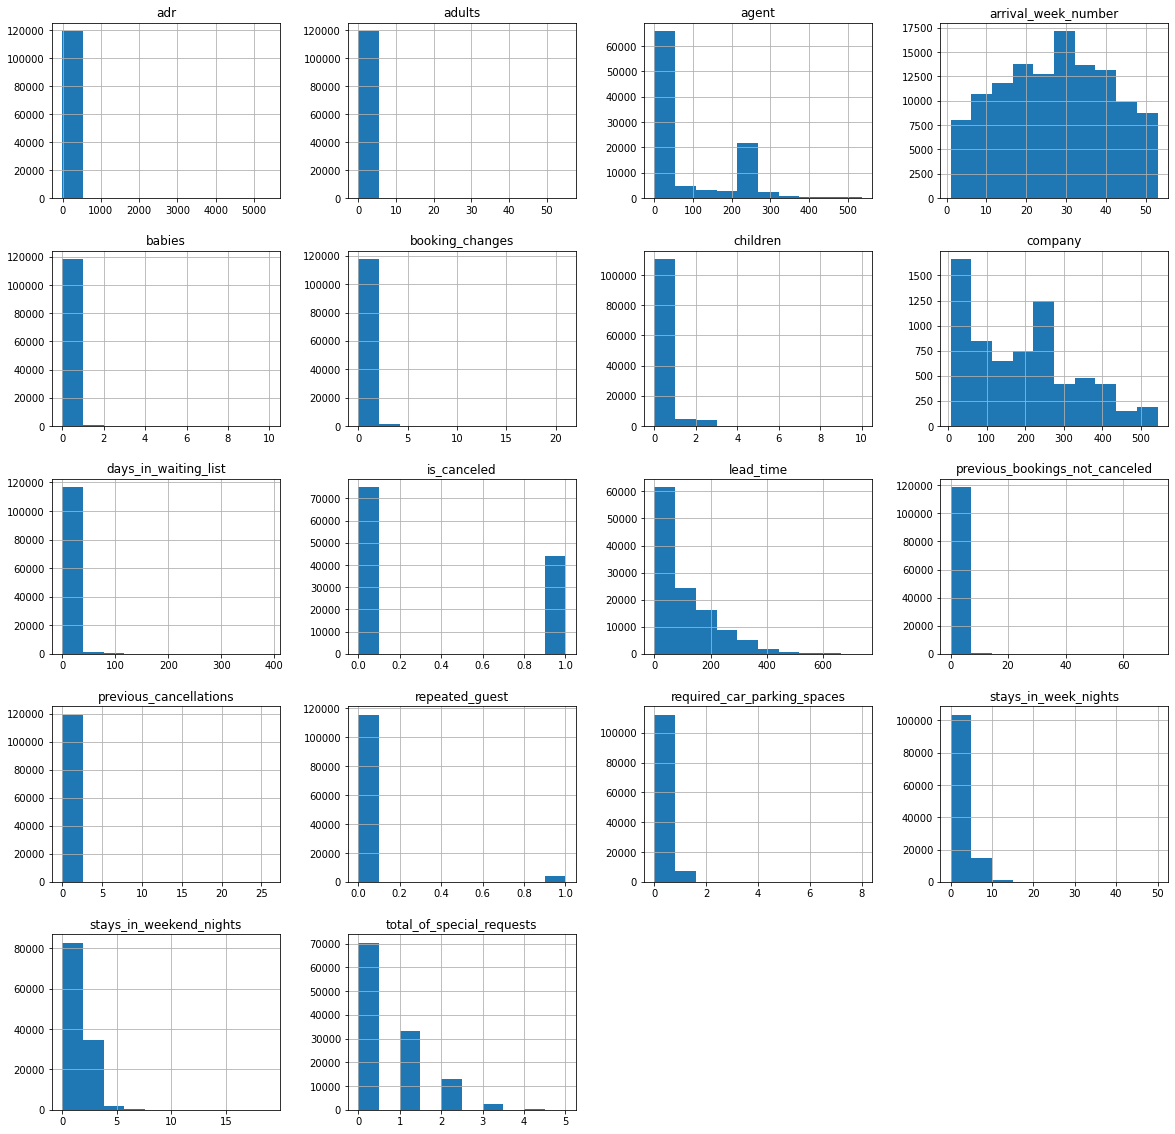

In [8]:
# Visually the dataset by plotting histogram
df.hist(figsize=(20,20))
plt.show()

In [9]:
#Convert date 
df.arrival_date = pd.to_datetime(df.arrival_date)
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

In [10]:
df.set_index('arrival_date', inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119390 entries, 2015-01-07 to 2017-08-29
Data columns (total 29 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_week_number               119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
repeated_guest                    119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canc

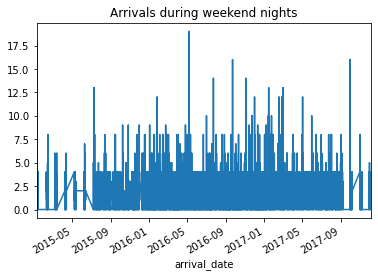

In [12]:
df.stays_in_weekend_nights.plot(title = 'Arrivals during weekend nights')
plt.tight_layout; plt.show()

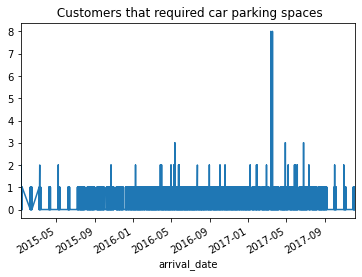

In [13]:
df.required_car_parking_spaces.plot(title = ' Customers that required car parking spaces')
plt.tight_layout; plt.show()

In [14]:
#pd.plotting.scatter_matrix(df,figsize=(20,20))
#plt.show()

In [15]:
# We want to know how well does each feature correlate between the variables 
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,is_canceled,lead_time,arrival_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.008148,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.126871,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_week_number,0.008148,0.126871,1.000000,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
stays_in_weekend_nights,-0.001791,0.085671,0.018208,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.015558,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.025909,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.005518,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,0.010395,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889
repeated_guest,-0.084793,-0.124410,-0.030131,-0.087239,-0.097245,-0.146426,-0.032859,-0.008943,1.000000,0.082293,0.418056,0.012092,0.031527,-0.244586,-0.022235,-0.134314,0.077090,0.013050
previous_cancellations,0.110133,0.086042,0.035501,-0.012775,-0.013992,-0.006738,-0.024730,-0.007501,0.082293,1.000000,0.152728,-0.026993,-0.012488,-0.184574,0.005929,-0.065646,-0.018492,-0.048384


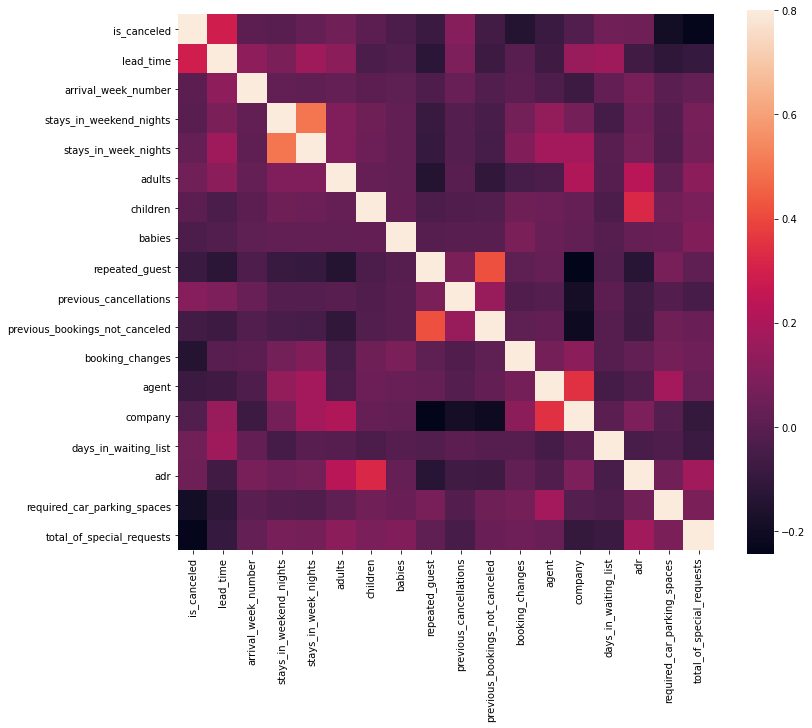

In [16]:
# Correlation matrix
import seaborn as sns

correlation_matrix = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix,vmax = 0.8, square = True)
plt.show()

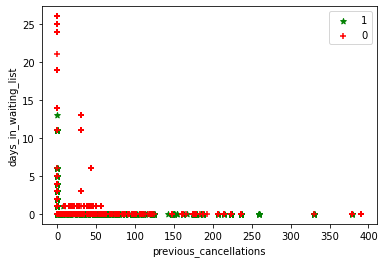

In [17]:
# Scatter plot to visualize parameters with positive correlation with 'IsBadBuy'
plt.scatter(df[df['is_canceled'] == 0]['days_in_waiting_list'], 
            df[df['is_canceled'] == 0]['previous_cancellations'], color='g', marker='*', label='1')
plt.scatter(df[df['is_canceled'] == 1]['days_in_waiting_list'], 
            df[df['is_canceled'] == 1]['previous_cancellations'], color='r',marker = '+', label='0')
plt.xlabel('previous_cancellations')
plt.ylabel('days_in_waiting_list')
plt.legend()
plt.show()

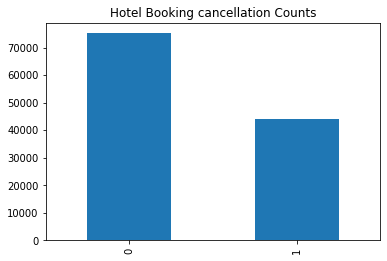

In [18]:
df['is_canceled'].value_counts()
df['is_canceled'].value_counts().plot(kind='bar', 
                                   title='Hotel Booking cancellation Counts')
plt.show()

In [19]:
# Checking for missing observations 
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_week_number               False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
repeated_guest                    False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True
days_in_waiting_list              False
customer_type                     False
adr                               False


## Replacing Missing observations in the Dataset

In [20]:
# Checking the distribution of categorical features in the dataset 
df.describe(include=['O'])

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,5,177,8,5,10,12,3,4,3
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,92310,48590,56477,97870,85994,74053,104641,89613,75166


#### First we fill in the missing observations in categorical variables of the dataset

In [21]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

#### Next we fill-in the missing observations for the continuous variable type in the dataset

In [22]:
# Filling Missing observations in Continuous variables in the dataset:
df.fillna(df.mean(), inplace=True)

In [23]:
# Converting categorical variables to unique integers in the dataset df

hotel_locs = sorted(df['hotel'].unique())
hotel_locs_mapping = dict(zip(hotel_locs, range(0, len(hotel_locs) + 1)))
hotel_locs_mapping
df['hotel'] = df['hotel'].map(hotel_locs_mapping).astype(int)


meal_locs = sorted(df['meal'].unique())
meal_locs_mapping = dict(zip(meal_locs, range(0, len(meal_locs) + 1)))
meal_locs_mapping
df['meal'] = df['meal'].map(meal_locs_mapping).astype(int)

country_locs = sorted(df['country'].unique())
country_locs_mapping = dict(zip(country_locs, range(0, len(country_locs) + 1)))
meal_locs_mapping
df['country'] = df['country'].map(country_locs_mapping).astype(int)


market_locs = sorted(df['market_segment'].unique())
market_locs_mapping = dict(zip(market_locs, range(0, len(market_locs) + 1)))
market_locs_mapping
df['market_segment'] = df['market_segment'].map(market_locs_mapping).astype(int)



distribution_locs = sorted(df['distribution_channel'].unique())
distribution_locs_mapping = dict(zip(distribution_locs, range(0, len(distribution_locs) + 1)))
distribution_locs_mapping
df['distribution_channel'] = df['distribution_channel'].map(distribution_locs_mapping).astype(int)


reserved_locs = sorted(df['reserved_room_type'].unique())
reserved_locs_mapping = dict(zip(reserved_locs, range(0, len(reserved_locs) + 1)))
reserved_locs_mapping
df['reserved_room_type'] = df['reserved_room_type'].map(reserved_locs_mapping).astype(int)


assigned_locs = sorted(df['assigned_room_type'].unique())
assigned_locs_mapping = dict(zip(assigned_locs, range(0, len(assigned_locs) + 1)))
assigned_locs_mapping
df['assigned_room_type'] = df['assigned_room_type'].map(assigned_locs_mapping).astype(int)

deposit_locs = sorted(df['deposit_type'].unique())
deposit_locs_mapping = dict(zip(deposit_locs, range(0, len(deposit_locs) + 1)))
deposit_locs_mapping
df['deposit_type'] = df['deposit_type'].map(deposit_locs_mapping).astype(int)


customer_locs = sorted(df['customer_type'].unique())
customer_locs_mapping = dict(zip(customer_locs, range(0, len(customer_locs) + 1)))
customer_locs_mapping
df['customer_type'] = df['customer_type'].map(customer_locs_mapping).astype(int)

status_locs = sorted(df['reservation_status'].unique())
status_locs_mapping = dict(zip(status_locs, range(0, len(status_locs) + 1)))
status_locs_mapping
df['reservation_status'] = df['reservation_status'].map(status_locs_mapping).astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119390 entries, 2015-01-07 to 2017-08-29
Data columns (total 29 columns):
hotel                             119390 non-null int32
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_week_number               119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119390 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null int32
country                           119390 non-null int32
market_segment                    119390 non-null int32
distribution_channel              119390 non-null int32
repeated_guest                    119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled 

In [25]:
# We want to know how well does each feature correlate the variables
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,hotel,is_canceled,lead_time,arrival_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
hotel,1.000000,-0.136531,-0.075381,-0.001270,0.186596,0.234020,0.013183,0.044204,0.043434,-0.008018,...,0.072820,-0.159021,0.718520,0.091656,-0.072432,-0.047531,-0.096719,0.218873,0.043390,0.124331
is_canceled,-0.136531,1.000000,0.293123,0.008148,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.017678,...,-0.144381,0.468634,-0.077992,-0.003877,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,-0.075381,0.293123,1.000000,0.126871,0.085671,0.165799,0.119519,-0.037621,-0.020915,0.000349,...,0.000149,0.375667,-0.065283,0.028188,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_week_number,-0.001270,0.008148,0.126871,1.000000,0.018208,0.015558,0.025909,0.005518,0.010395,-0.017381,...,0.005508,0.003891,-0.028306,-0.020959,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.018208,1.000000,0.498969,0.091871,0.045792,0.018483,0.045744,...,0.063281,-0.111435,0.131451,0.012798,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,0.234020,0.024765,0.165799,0.015558,0.498969,1.000000,0.092976,0.044202,0.020191,0.036742,...,0.096209,-0.076788,0.169218,0.038660,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
adults,0.013183,0.060017,0.119519,0.025909,0.091871,0.092976,1.000000,0.030446,0.018146,0.026327,...,-0.051673,-0.027644,-0.028033,0.041875,-0.008283,-0.101756,0.230641,0.014785,0.122884,-0.071802
children,0.044204,0.005048,-0.037621,0.005518,0.045792,0.044202,0.030446,1.000000,0.024030,-0.049798,...,0.048949,-0.096082,0.039422,0.002923,-0.033273,-0.053387,0.324841,0.056253,0.081743,-0.003410
babies,0.043434,-0.032491,-0.020915,0.010395,0.018483,0.020191,0.018146,0.024030,1.000000,0.002864,...,0.083440,-0.030443,0.033472,0.002417,-0.010621,-0.016137,0.029186,0.037383,0.097889,0.030971
meal,-0.008018,-0.017678,0.000349,-0.017381,0.045744,0.036742,0.026327,-0.049798,0.002864,1.000000,...,0.024650,-0.092151,-0.047213,0.013656,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393


In [26]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

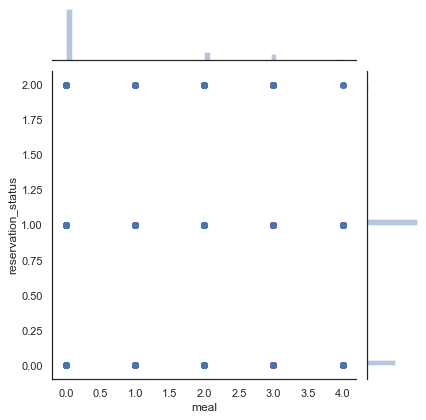

In [27]:
g = sns.jointplot(x="meal", y="reservation_status", data=df)

In [28]:
features =['hotel', 'lead_time', 'arrival_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']

In [29]:
df['is_canceled'].replace(0, 'No',inplace=True)
df['is_canceled'].replace(1, 'Yes',inplace=True)


In [30]:
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['is_canceled']].values

In [31]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,1,No,342,27,0,0,2,0.0,0,0,...,0,86.693382,189.266735,0,2,0.0,0,0,1,2015-07-01
2015-01-07,1,No,737,27,0,0,2,0.0,0,0,...,0,86.693382,189.266735,0,2,0.0,0,0,1,2015-07-01
2015-01-07,1,No,7,27,0,1,1,0.0,0,0,...,0,86.693382,189.266735,0,2,75.0,0,0,1,2015-07-02
2015-01-07,1,No,13,27,0,1,1,0.0,0,0,...,0,304.000000,189.266735,0,2,75.0,0,0,1,2015-07-02


In [32]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [34]:
principalDf['is_canceled'] = df.loc[:,['is_canceled']].values

In [35]:
principalDf.head()

,principal component 1,principal component 2,is_canceled
0,-0.473233,-2.647726,No
1,-0.912365,-1.989631,No
2,-0.372158,-2.659864,No
3,-0.495412,-3.805002,No
4,0.683817,-0.093681,No


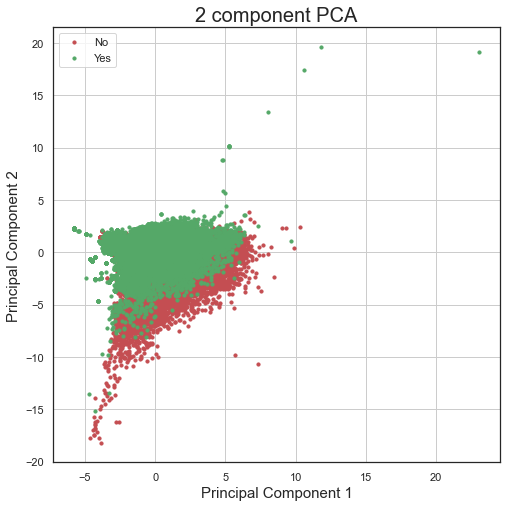

In [36]:
# Visualization of the PCA 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['No', 'Yes']
colors = ['r', 'g', 'b']
for is_canceled, color in zip(targets,colors):
    indicesToKeep = principalDf['is_canceled'] == is_canceled
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [37]:
# import the necessary packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

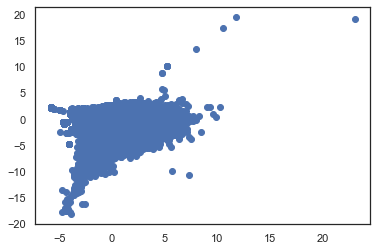

In [38]:
# Visualize true data points before the applications of K-means clustering 
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], label='True Position')

#### K-means clustering algorithm

In [39]:
principalDf['is_canceled'].replace('No', 0, inplace=True)
principalDf['is_canceled'].replace('Yes', 1, inplace=True)

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(principalDf)

In [40]:
km.labels_[:5]

array([2, 2, 2, 2, 1])

In [41]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([61083, 39545, 18762], dtype=int64))

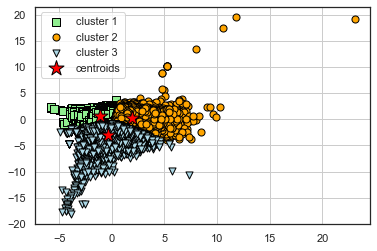

In [42]:
# plot the 3 clusters
plt.scatter(
    principalDf.iloc[y_km == 0, 0], principalDf.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1')

plt.scatter(
    principalDf.iloc[y_km == 1, 0], principalDf.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2')

plt.scatter(
    principalDf.iloc[y_km == 2, 0], principalDf.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3')

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

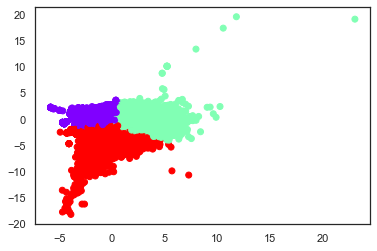

In [43]:
# Visualize the data points after applying the k-means clustering  
plt.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')

In [44]:
# Performing Centering of the k-means 
km.cluster_centers_

array([[-1.13384581,  0.70188659,  0.51962311],
       [ 1.92577895,  0.30742786,  0.25202739],
       [-0.37456968, -2.92841796,  0.13512938]])

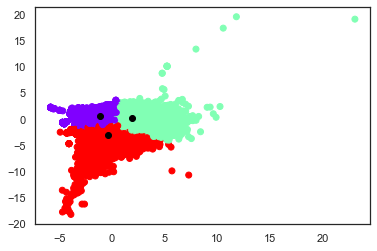

In [45]:
# Visualising the clusters after centering 
#Plot the centroid. This time we're going to use the cluster centres  

plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')

In [46]:
# Determining the exact cluster number using the silhouette elbow approach 

print('SSE %s' % km.inertia_)
print('Silhouette %s' % silhouette_score(principalDf, km.labels_))

SSE 306744.9287311182
Silhouette 0.39397778610002443


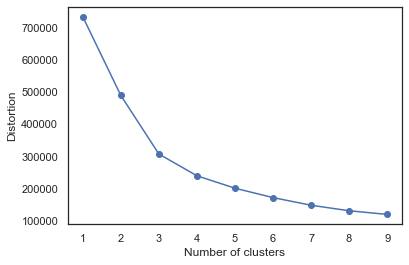

In [47]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 10):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalDf)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Hierarchical Clustering of the dataset

In [48]:
# import the required package 
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
# Because of memory error issues, sample the principal components 

# for quick visualizations and analysis, extract a sample from the dataset 

df_sample = principalDf.sample(frac = 0.05, random_state = 1)
print(df_sample.shape)

(5970, 3)


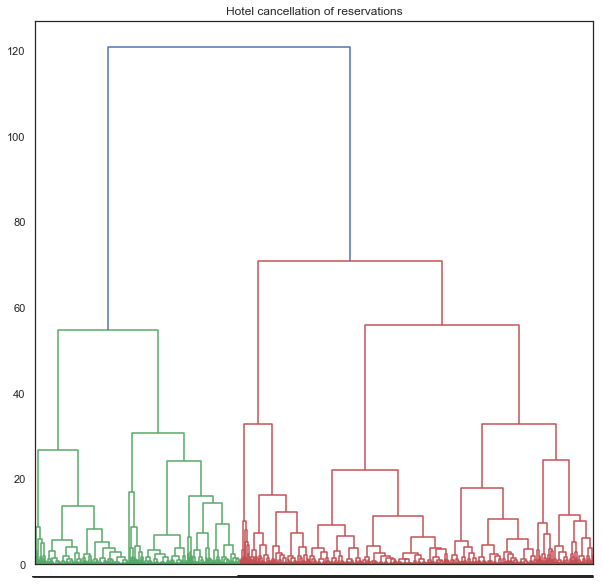

In [50]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(df_sample)

plt.figure(figsize=(10, 10))
plt.title("Hotel cancellation of reservations")
dend = shc.dendrogram(shc.linkage(X, method='ward'), labels=list(df_sample.is_canceled))